## Bollinger Bands

Bollinger Bands represent a key technical trading tool for financial traders. Bollinger bands are plotted by two (2) standard deviations (a measure of volatility) away from the moving average of a price. Bollinger Bands allow traders to monitor and take advantage of shifts in price volatilities

Main Components of a Bollinger Bands

Upper Band: The upper band is simply two standard deviations above the moving average of a stock’s price.
    
Middle Band: The middle band is simply the moving average of the stock’s price.
    
Lower Band: Two standard deviations below the moving average is the lower band.

In [1]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [2]:
# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

In [3]:
# Get Adjusted Closing Prices for Amazon between 2015-2019
amzn = get_adj_close('amzn', '1/2/2015', '31/12/2019')

In [4]:
amzn

,Adj Close
Date,
2015-01-02,308.519989
2015-01-05,302.190002
2015-01-06,295.290009
2015-01-07,298.420013
2015-01-08,300.459991
...,...
2019-12-24,1789.209961
2019-12-26,1868.770020
2019-12-27,1869.800049


In [7]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
amzn['30 Day MA'] = amzn['Adj Close'].rolling(window=20).mean()
amzn['30 Day STD'] = amzn['Adj Close'].rolling(window=20).std()
amzn['Upper Band'] = amzn['30 Day MA'] + (amzn['30 Day STD'] * 2)
amzn['Lower Band'] = amzn['30 Day MA'] - (amzn['30 Day STD'] * 2)

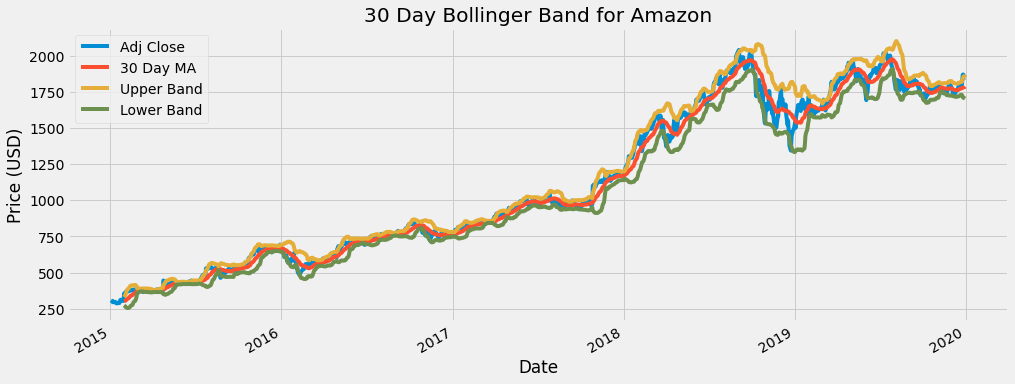

In [13]:
# Simple 30 Day Bollinger Band for Facebook (2016-2017)
amzn[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(15,6))
plt.title('30 Day Bollinger Band for Amazon')
plt.ylabel('Price (USD)')
plt.show()

No handles with labels found to put in legend.


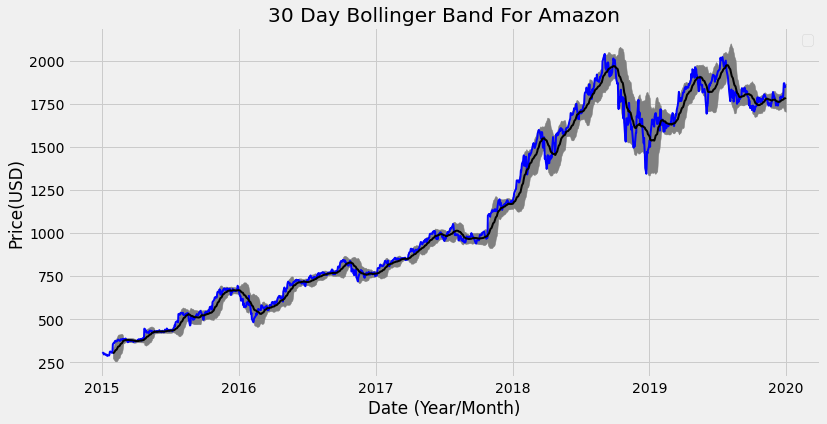

In [11]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for Amazon DataFrame
x_axis = amzn.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Amazon
ax.fill_between(x_axis, amzn['Upper Band'], amzn['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, amzn['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, amzn['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Amazon')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()